In [1]:
import numpy as np
import pandas as pd
Data=pd.read_excel('C:\\Users\\asus\\OneDrive\\Documents\\Anvesh_project\\datageneration.xlsx')

In [2]:
data1=Data.iloc[:,1:5]
from sklearn.preprocessing import MinMaxScaler      # To preprocess the data and Normalise the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1.values)

In [3]:
x = scaled_data[:,0:3]
y = scaled_data[:,3]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=0)

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
net = Sequential()
net.add(Dense(140,input_dim=3,activation='linear'))      
net.add(Dense(150,activation='relu'))                    
net.add(Dense(1,activation='sigmoid'))

In [8]:
net.compile(optimizer = 'adam', loss = 'MSE')

In [9]:
history = net.fit(x_train, y_train, epochs = 750, validation_split=0.15)

Epoch 1/750
91/91 [==============================] - 2s 12ms/step - loss: 0.0275 - val_loss: 0.0245
Epoch 2/750
91/91 [==============================] - 0s 4ms/step - loss: 0.0203 - val_loss: 0.0184
Epoch 3/750
91/91 [==============================] - 1s 8ms/step - loss: 0.0170 - val_loss: 0.0159
Epoch 4/750
91/91 [==============================] - 1s 8ms/step - loss: 0.0154 - val_loss: 0.0142
Epoch 5/750
91/91 [==============================] - 1s 6ms/step - loss: 0.0134 - val_loss: 0.0121
Epoch 6/750
91/91 [==============================] - 1s 7ms/step - loss: 0.0120 - val_loss: 0.0130
Epoch 7/750
91/91 [==============================] - 1s 6ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 8/750
91/91 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 9/750
91/91 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 10/750
91/91 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 11

In [10]:
from sklearn.metrics import r2_score
y_train_pre = net.predict(x_train)
r2_train = r2_score(y_train, y_train_pre)
r2_train

107/107 [==============================] - 1s 2ms/step


0.9844840487816934

In [11]:
y_test_pre=net.predict(x_test)
r2_test = r2_score(y_test, y_test_pre)
r2_test

19/19 [==============================] - 0s 3ms/step


0.9843665552663128

In [12]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pre)
mse_train

0.0003284244721980146

In [13]:
mse_test=mean_squared_error(y_test, y_test_pre)
mse_test

0.0003672009589089905

In [14]:
from matplotlib import pyplot as p

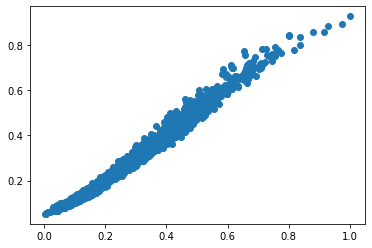

In [15]:
p.scatter(y_train, y_train_pre)

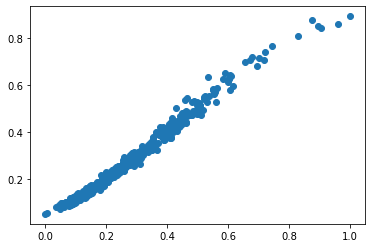

In [16]:
p.scatter(y_test, y_test_pre)